In [1]:


import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

import openml

dataset_id = 1457
dataset = openml.datasets.get_dataset(dataset_id)

# X - data frame com as instâncias
# y - array com a variável alvo / target
X, y, _, _ = dataset.get_data(
    dataset_format="dataframe",
    target=dataset.default_target_attribute
)




/tmp/ipykernel_43300/2254618849.py:12: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(dataset_id)


In [2]:
 #Print inicial para verificar os dados como estão destribuidos, ele retorna quatas vezes a carácterística foi usada

#juntar todas as reviews de cada usuário
grupos = y.groupby(y.index // 30)

#formatar o dataframe, juntando 30 linhas, que equivalem a todas as revisões feitas por cada usuário
def reformat_dataframe(df, a):
    # Agrupando as linhas
    row_groups = np.arange(len(df)) // a
    df_row_reduced = df.groupby(row_groups).sum()

    return df_row_reduced

X_reduced = reformat_dataframe(X, 30)


nomes = grupos.first().values

assert len(nomes) == len(X_reduced)

X_reduced.index = nomes

X_reduced

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
Agresti,390,115,168,125,156,131,46,71,59,97,...,8,4,4,22,5,5,7,5,6,1
Ashbacher,463,191,189,263,155,176,35,137,102,59,...,3,5,3,2,6,3,13,8,4,5
Auken,246,159,214,172,121,135,9,69,55,39,...,7,8,2,4,4,0,2,11,3,4
Blankenship,364,303,255,246,207,219,197,128,112,90,...,6,2,10,13,10,11,9,11,7,9
Brody,239,207,190,112,129,148,143,115,72,43,...,1,5,5,4,3,7,9,3,10,3
Brown,220,190,134,119,118,129,170,79,96,118,...,14,2,3,0,5,8,4,2,7,8
Bukowsky,345,325,296,215,240,236,29,109,96,49,...,10,2,4,3,2,2,7,5,7,10
Calvinnme,325,207,197,224,145,168,74,137,107,82,...,4,7,4,5,7,7,10,3,9,3
CFH,351,236,204,117,213,124,85,88,85,55,...,8,8,12,6,0,0,3,4,8,1
Chachra,196,180,125,69,127,69,99,57,67,95,...,2,4,9,3,2,6,2,2,7,3


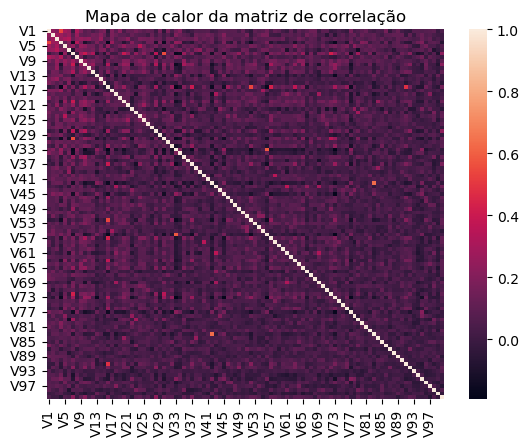

Coluna V1 tem alta correlação com as colunas: ['V4']
Coluna V7 tem alta correlação com as colunas: ['V30']
Coluna V16 tem alta correlação com as colunas: ['V52']
Coluna V33 tem alta correlação com as colunas: ['V56']
Coluna V42 tem alta correlação com as colunas: ['V83']


In [3]:

#comparar as carácterísticas para encontrar padrões

X_subset = X.iloc[:, 0:100]
correlation_matrix = X_subset.corr()

correlation_matrix = X_subset.corr()
sns.heatmap(correlation_matrix)
plt.title('Mapa de calor da matriz de correlação')
plt.show()

threshold = 0.5 # limite de corelação a ser mostrado
similar_columns = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1 , len(correlation_matrix.columns)):
        if np.abs(correlation_matrix.iloc[i, j]) >= threshold:
            col_name_i = correlation_matrix.columns[i]
            col_name_j = correlation_matrix.columns[j]
            if col_name_i not in similar_columns:
                similar_columns[col_name_i] = []
            similar_columns[col_name_i].append(col_name_j)

# Imprime as colunas com alta correlação
for key, values in similar_columns.items():
    print(f'Coluna {key} tem alta correlação com as colunas: {values}')



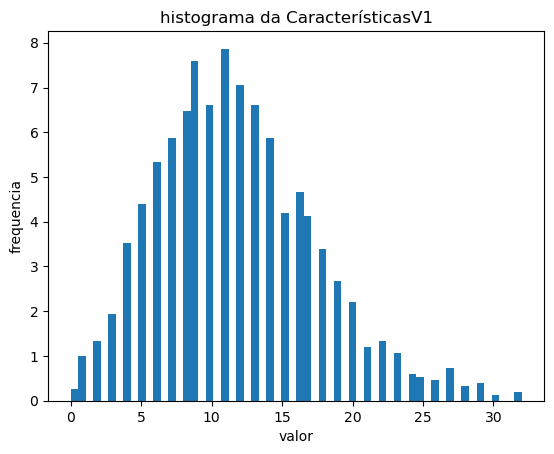

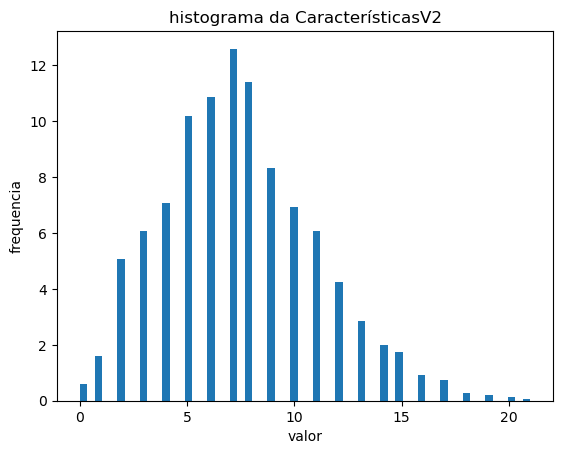

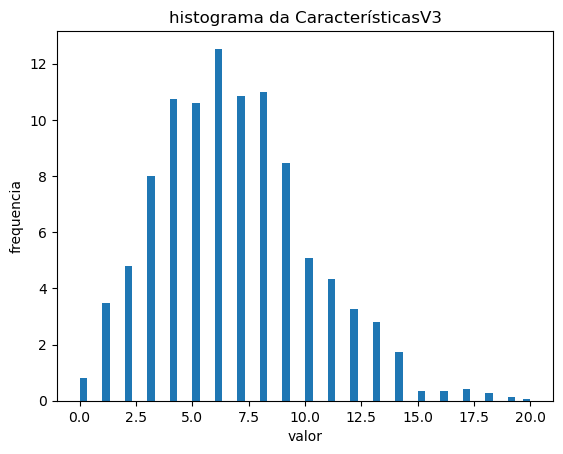

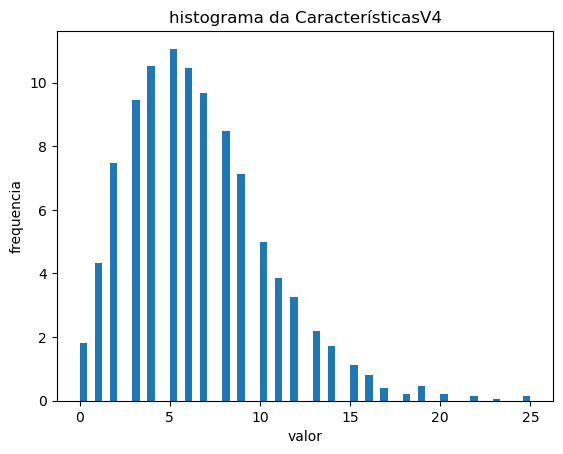

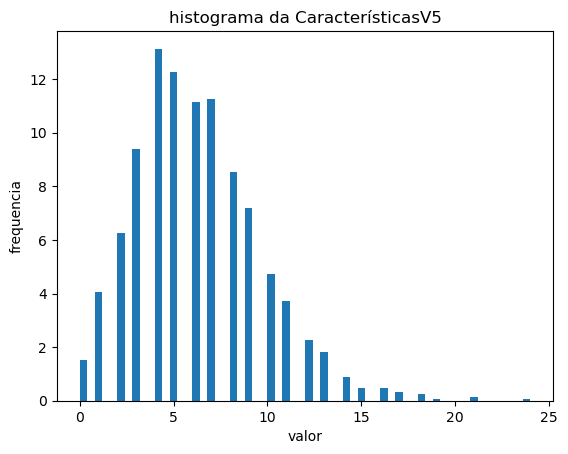

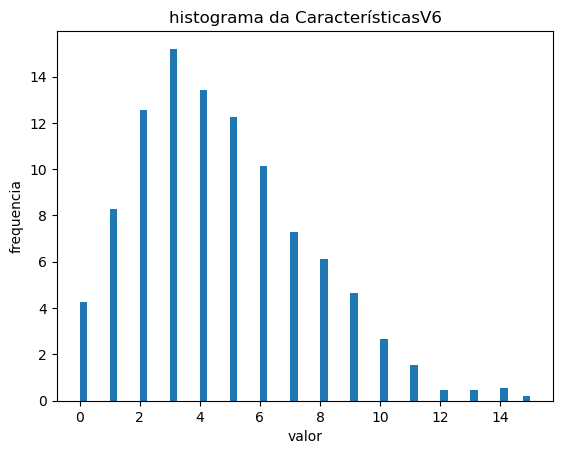

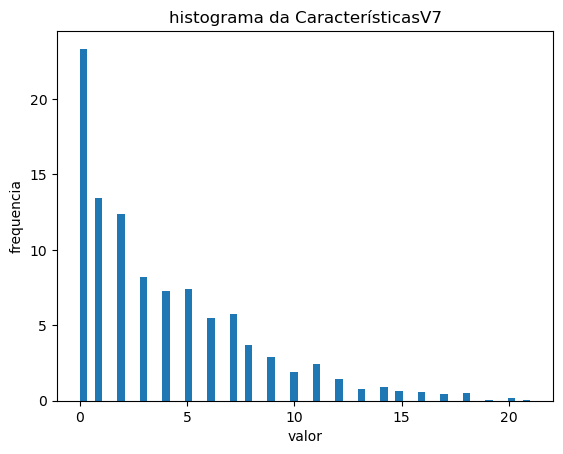

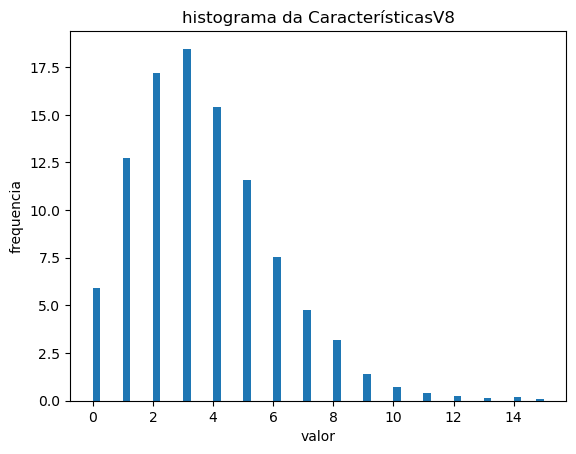

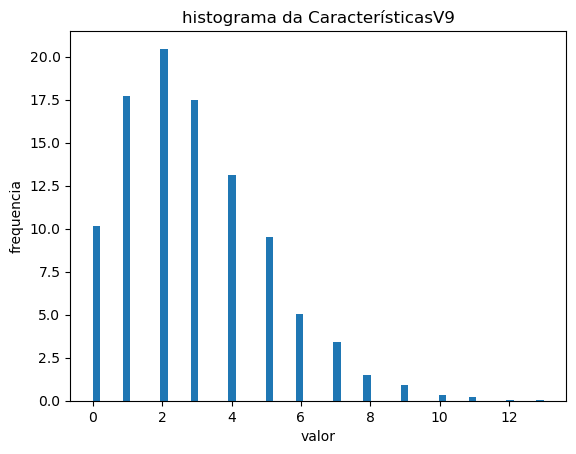

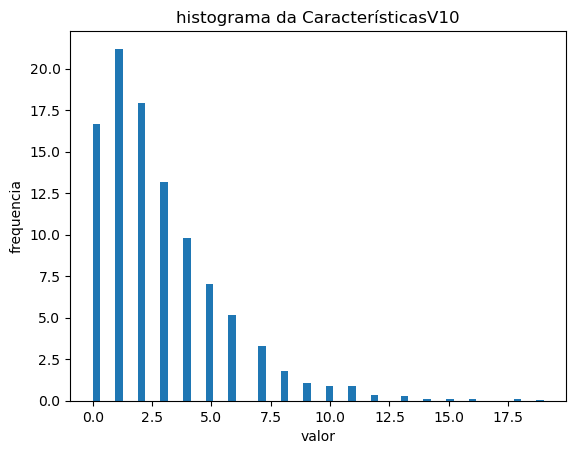

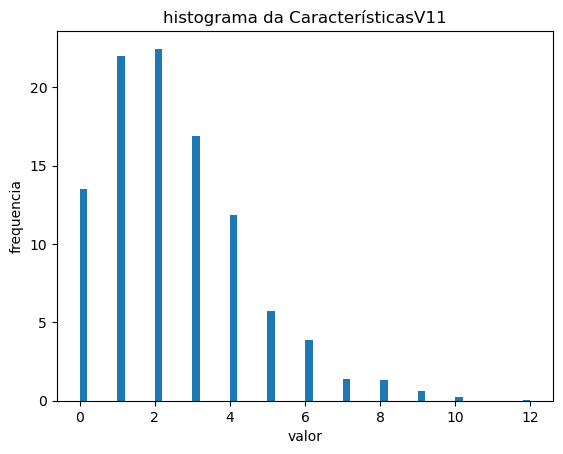

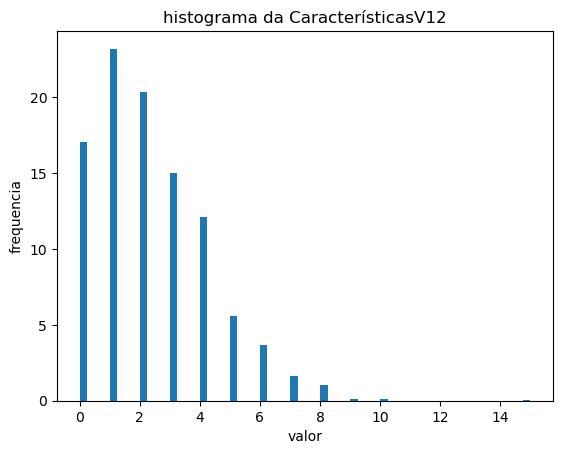

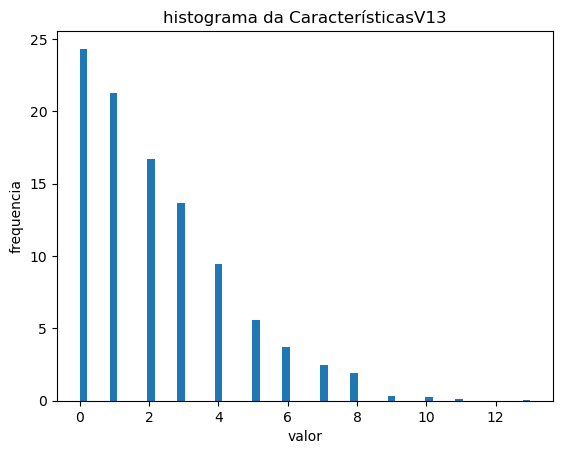

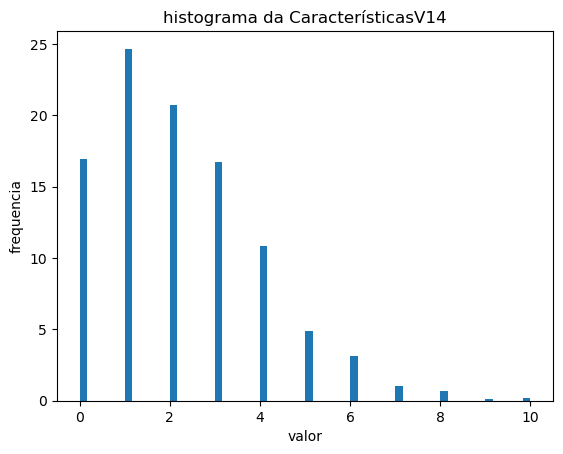

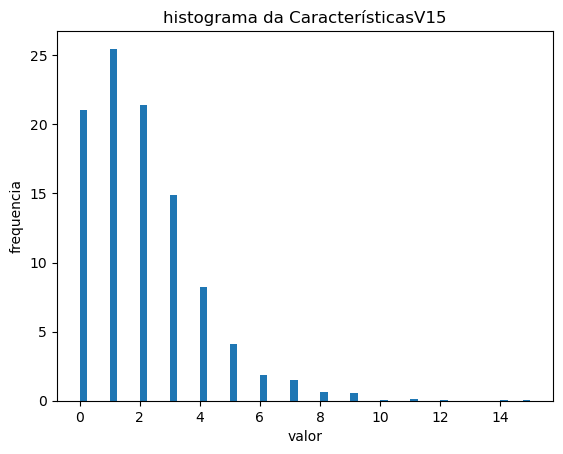

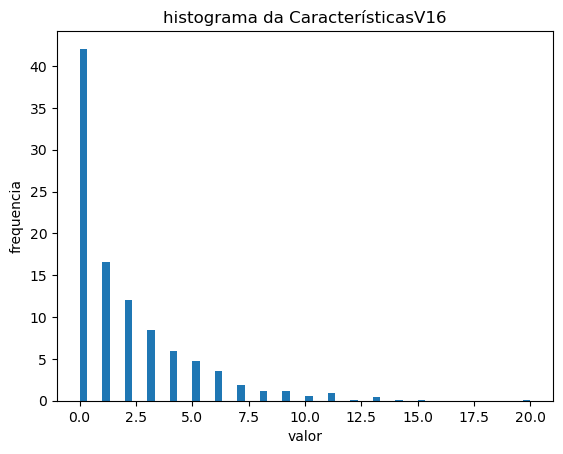

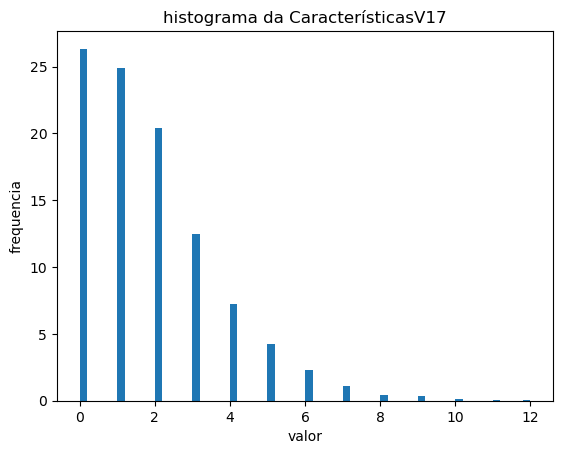

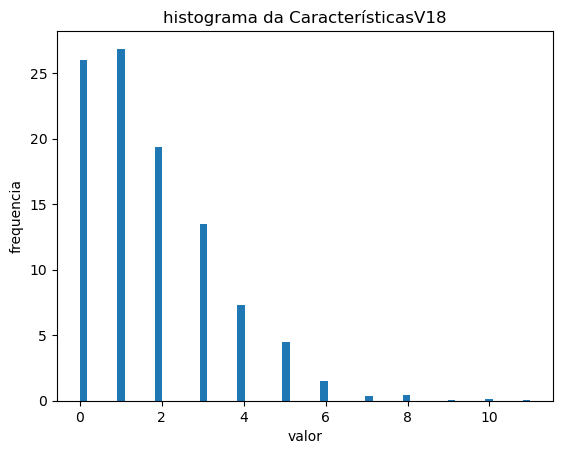

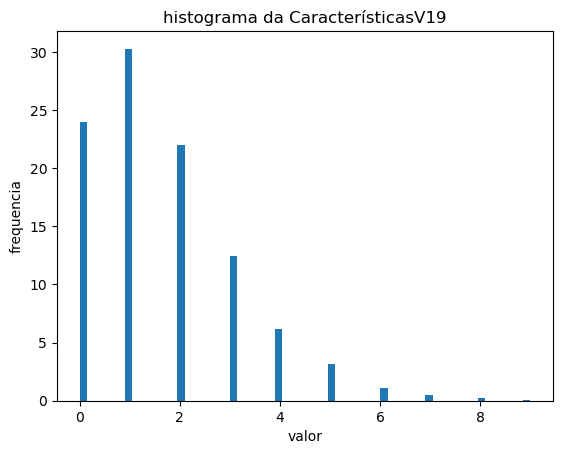

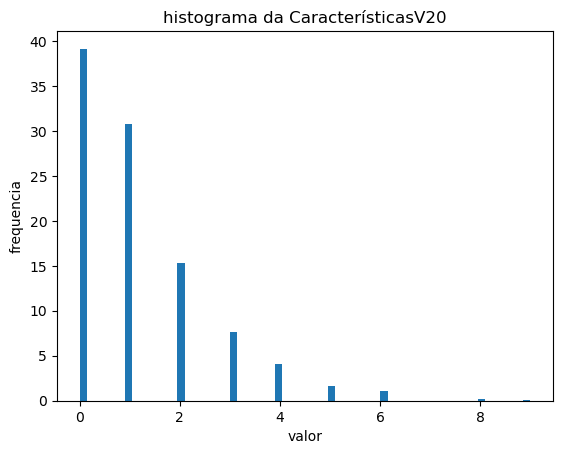

In [4]:
count = 0

for column in X.columns:
    if count < 20:
      #normalização dos dados para uma frequência de 0 a 100
      weights = np.ones_like(X[column])/float(len(X[column]))*100
      plt.hist(X[column], bins=60, weights=weights)
      plt.title('histograma da Características' + column)
      plt.xlabel('valor')
      plt.ylabel('frequencia')
      plt.show()
      count += 1
#Observação de 20 histogramas. Possibilita uma melhor visualização do padrão de uso de carácterísticas

In [5]:
X.isnull().sum() #verificação se existe algum valor ausente no dataset, o que retorna nenhum valor ausente
#a saída mostra que no dataset não há valores faltantes

V1        0
V2        0
V3        0
V4        0
V5        0
         ..
V9996     0
V9997     0
V9998     0
V9999     0
V10000    0
Length: 10000, dtype: int64

In [6]:
# Criando um novo DataFrame para armazenar os dados sem outliers
X_out = X.copy()

# Criando um dicionário para armazenar o número de outliers para cada coluna
outliers_dict = {}

total_outliers = 0

for column in X_out.columns:
    # Calculando a média e o desvio padrão da coluna
    mean = X_out[column].mean()
    std = X_out[column].std()

    # Identificando os outliers usando a média de cada coluna
    outliers = (np.abs(X_out[column] - mean) > 3 * std)

    # Contando o número de outliers
    num_outliers = outliers.sum()

    # contando todos os outliers existentes
    total_outliers += num_outliers

    # Adicionando o número de outliers ao dicionário
    outliers_dict[column] = num_outliers

# Convertendo o dicionário em um DataFrame
outliers_df = pd.DataFrame(list(outliers_dict.items()), columns=['Coluna', 'Número de Outliers'])

print(outliers_df)

print(f"número total de: {total_outliers}.")

#no caso específico do dataset a limpeza não é bem vinda, os outliers entregam carácterísticas específicas de cada usuário


      Coluna  Número de Outliers
0         V1                  11
1         V2                   6
2         V3                  13
3         V4                  15
4         V5                  13
...      ...                 ...
9995   V9996                  37
9996   V9997                  36
9997   V9998                  35
9998   V9999                  36
9999  V10000                  51

[10000 rows x 2 columns]
número total de: 260745.


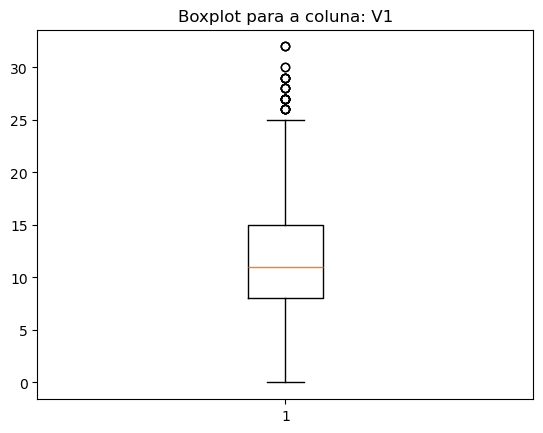

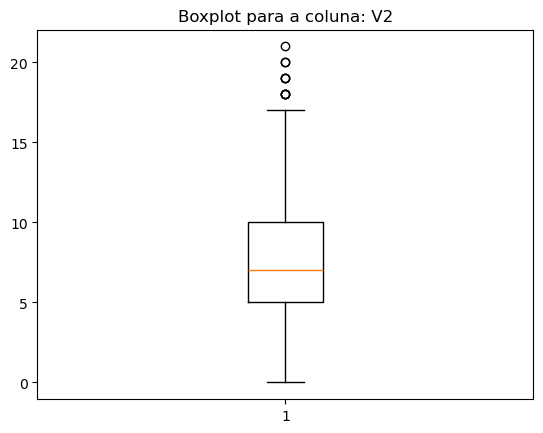

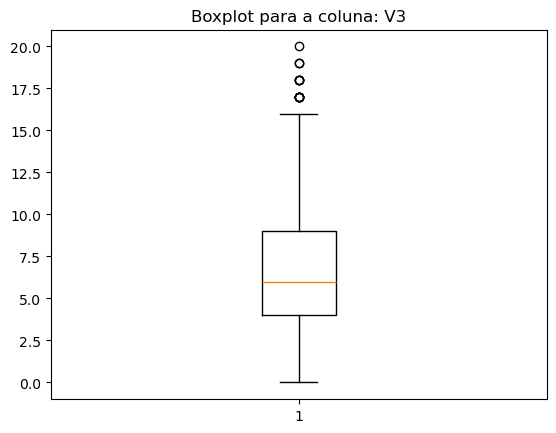

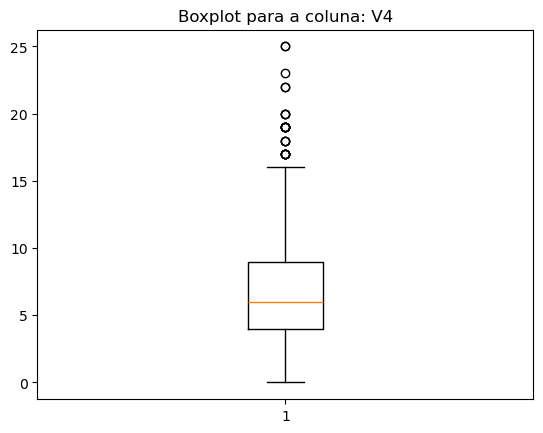

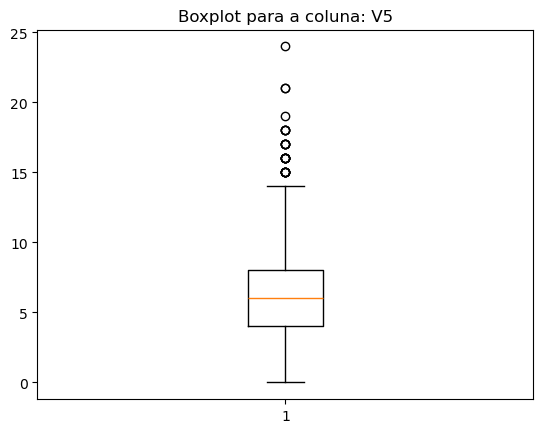

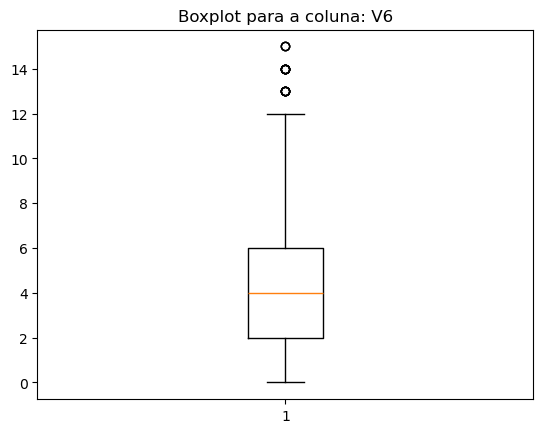

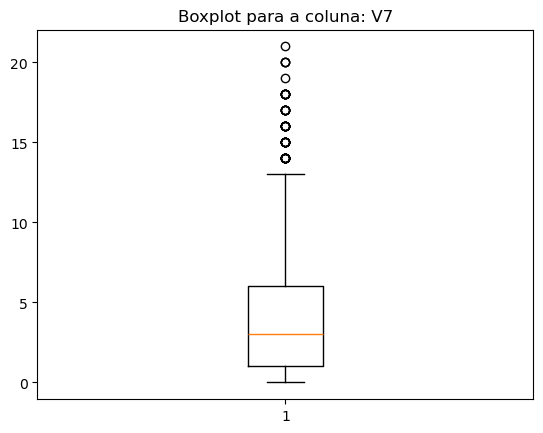

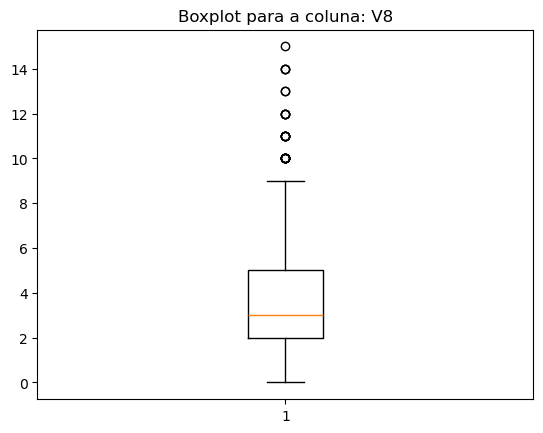

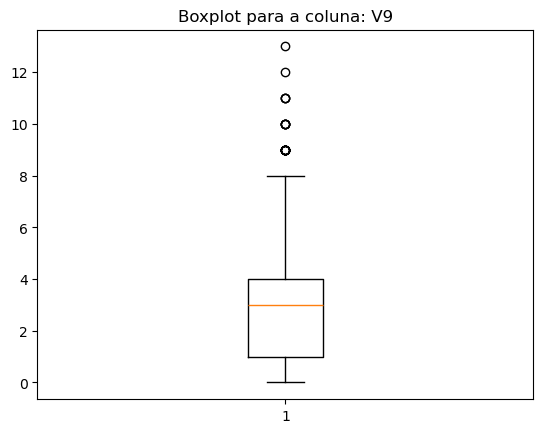

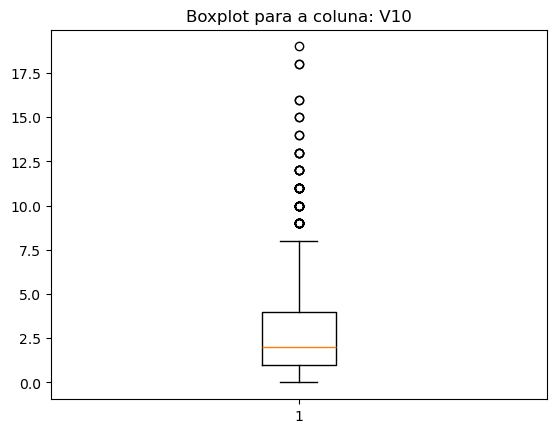

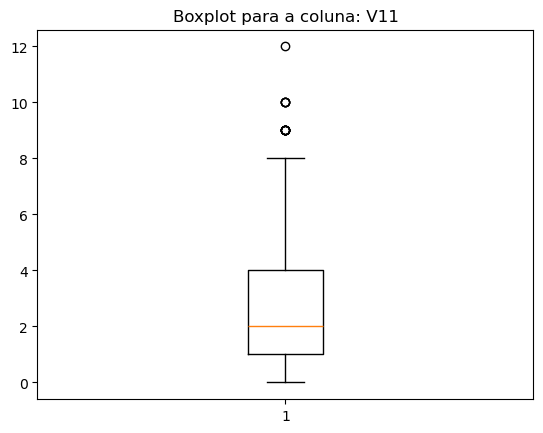

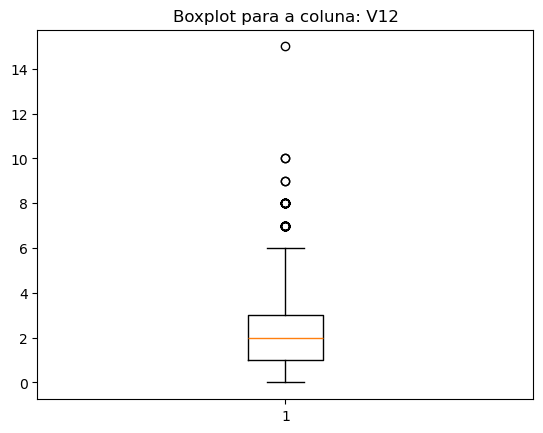

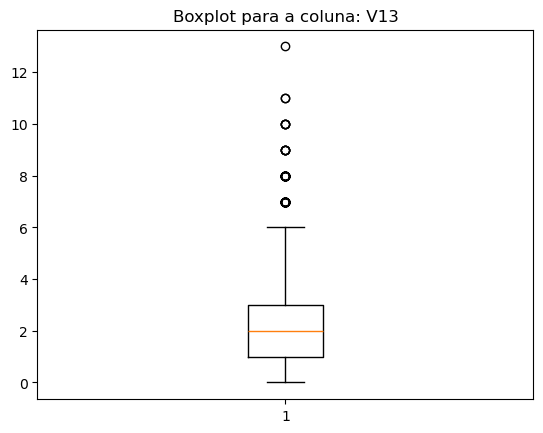

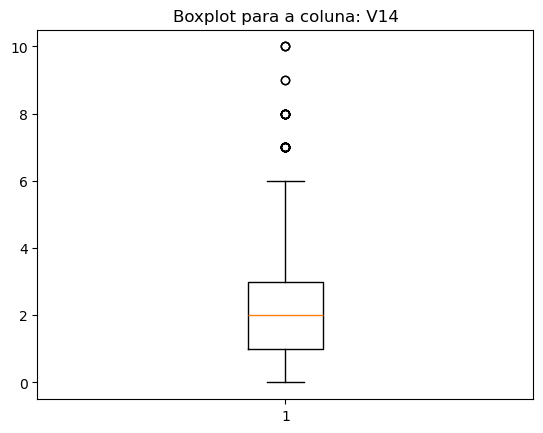

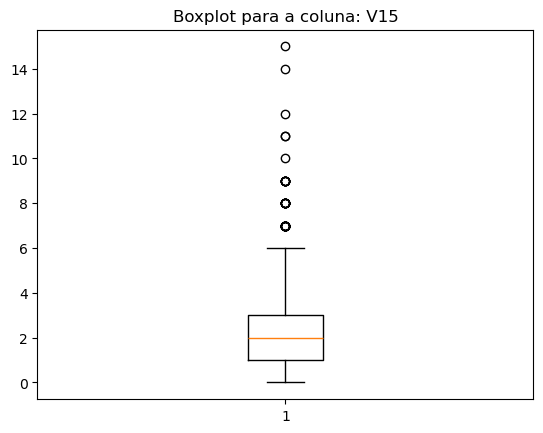

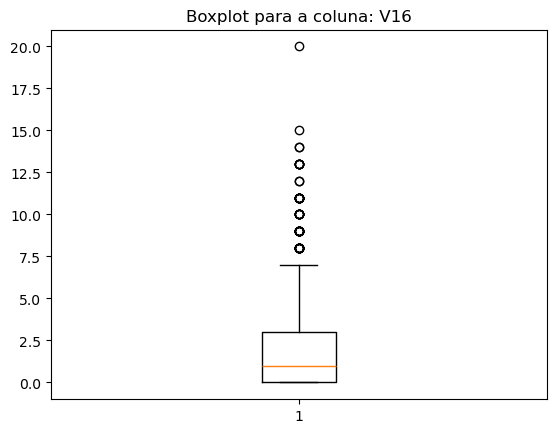

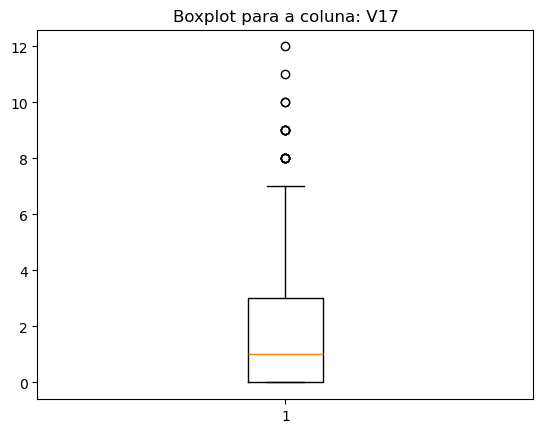

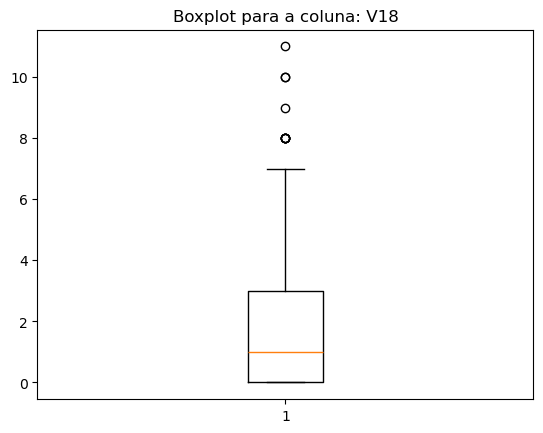

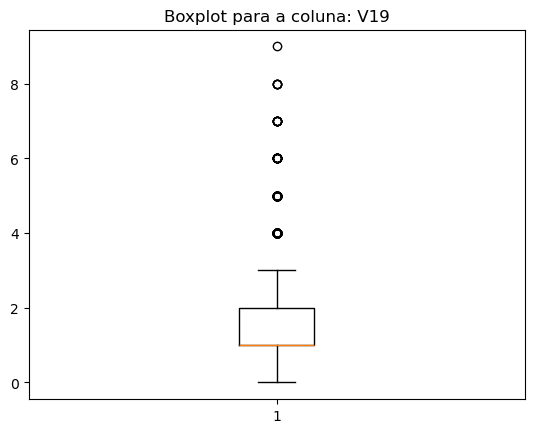

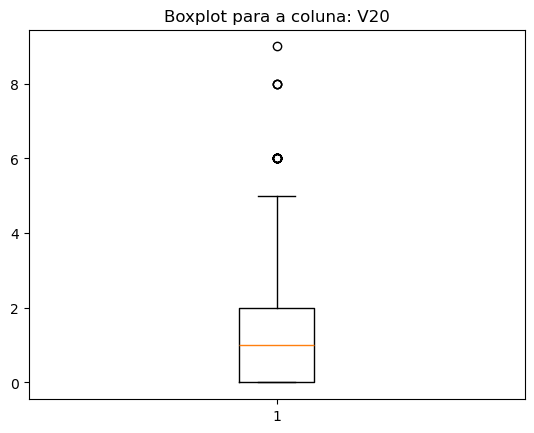

In [7]:
i = 0
for column in X.columns:
  if i < 20:

    plt.boxplot(X[column])

    plt.title('Boxplot para a coluna: ' + column)

    plt.show()

    i += 1

#demonstração gráfica do outlaier


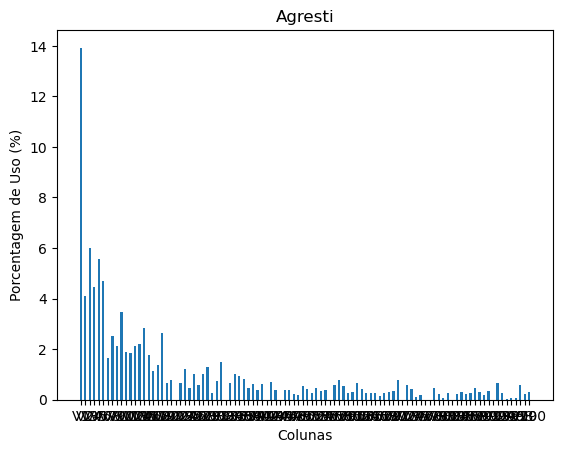

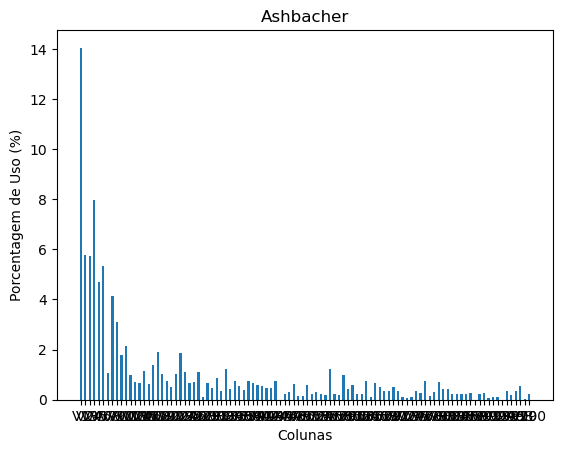

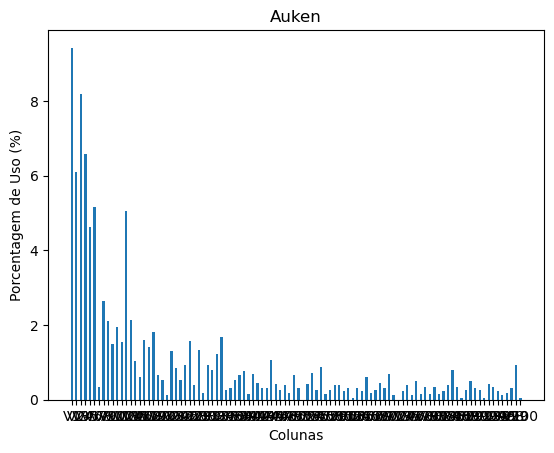

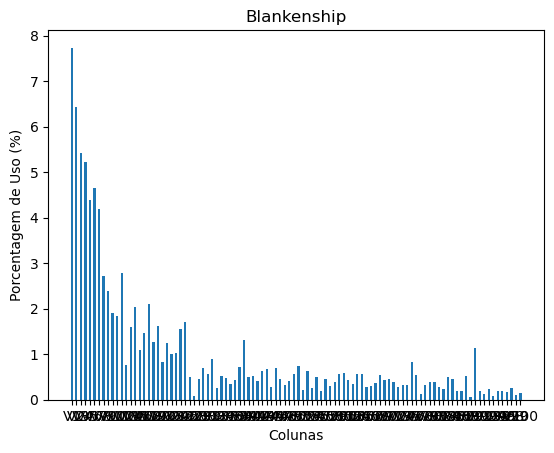

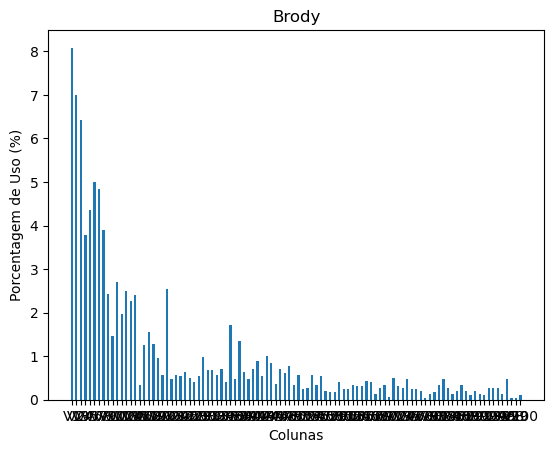

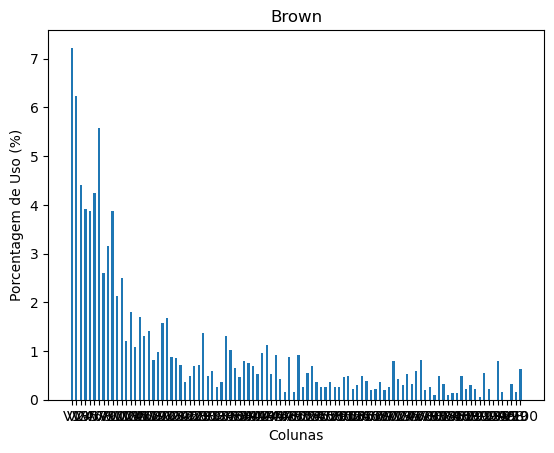

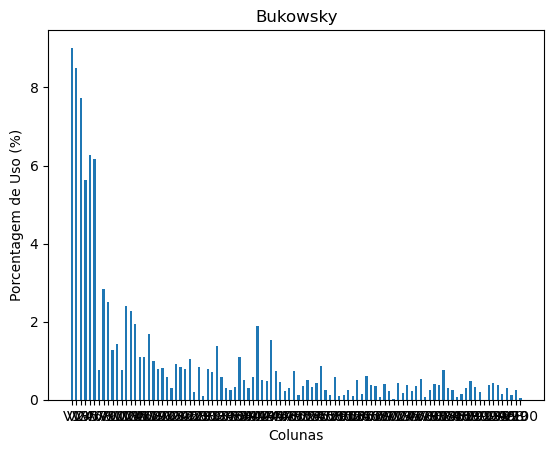

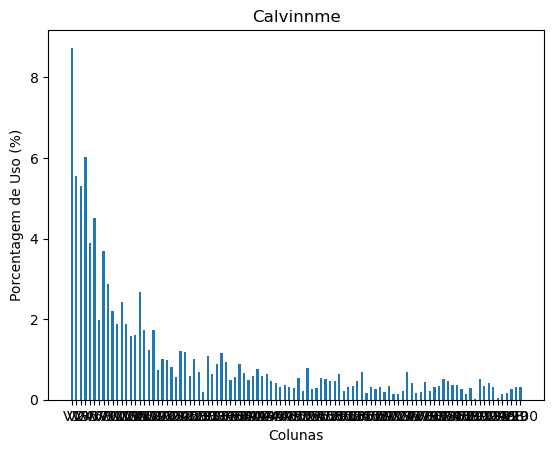

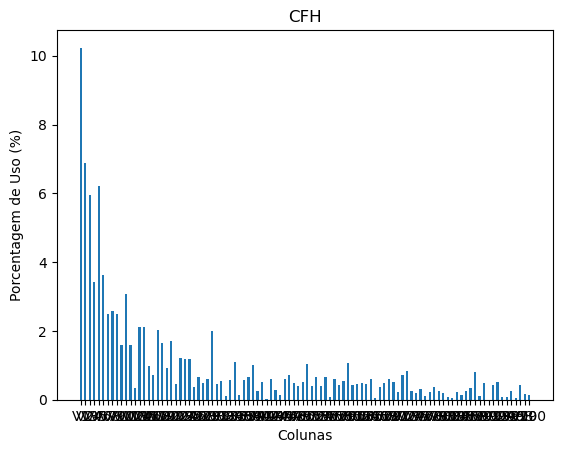

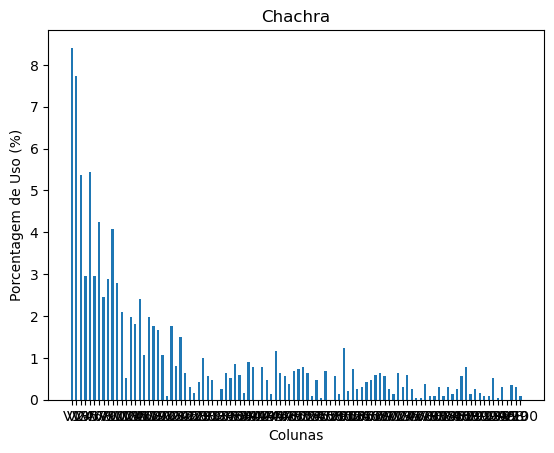

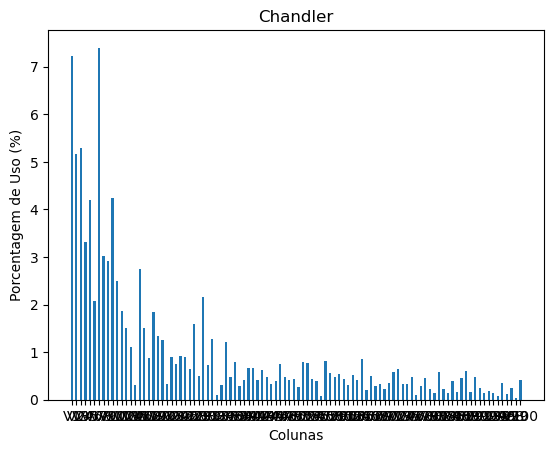

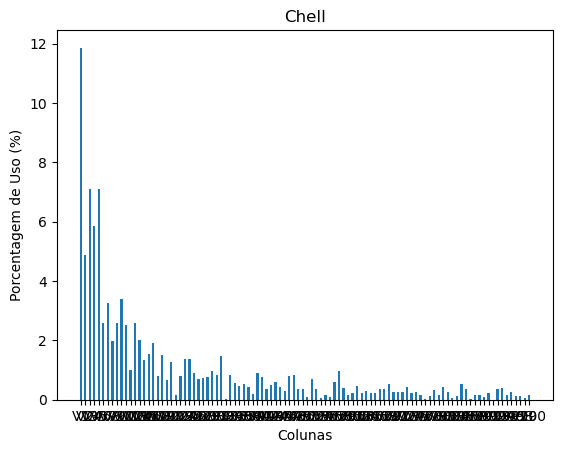

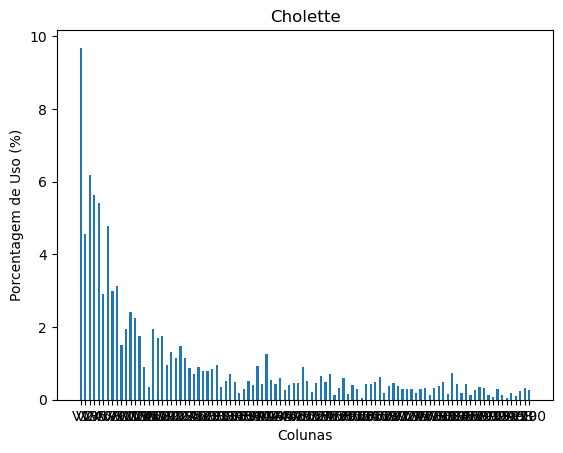

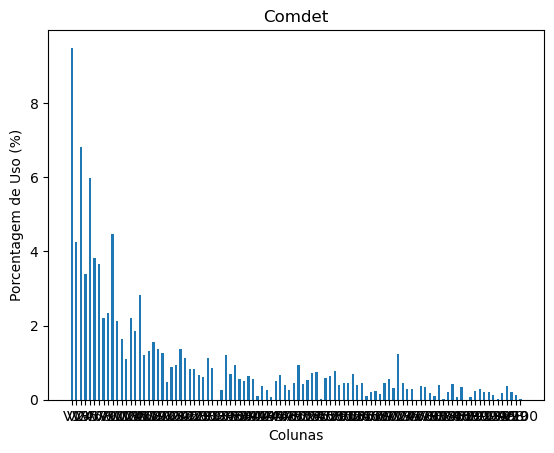

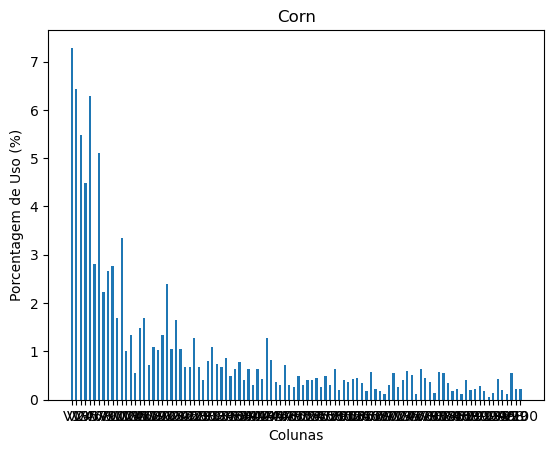

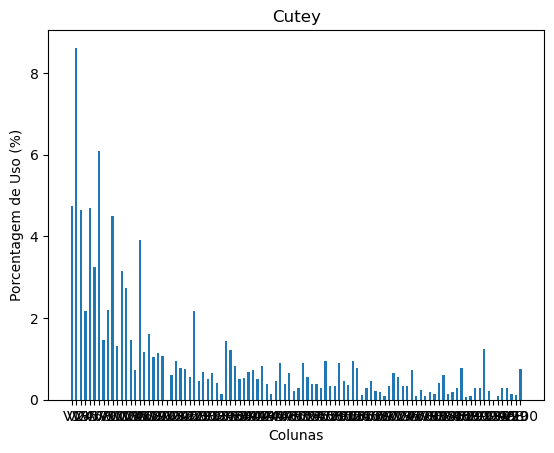

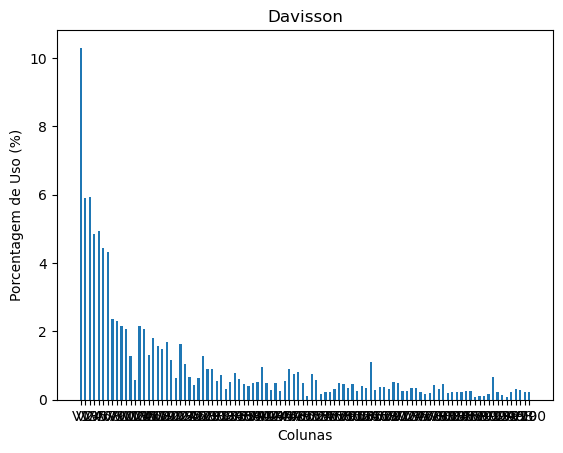

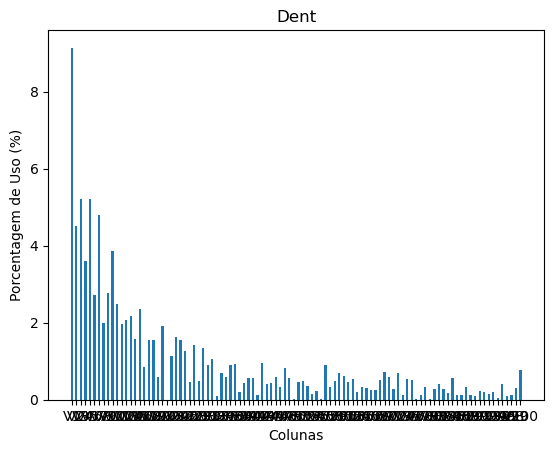

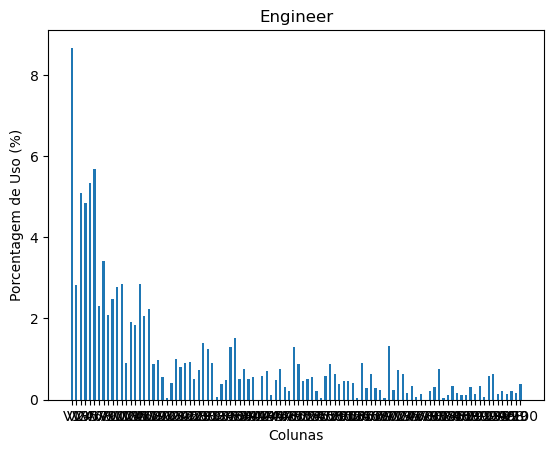

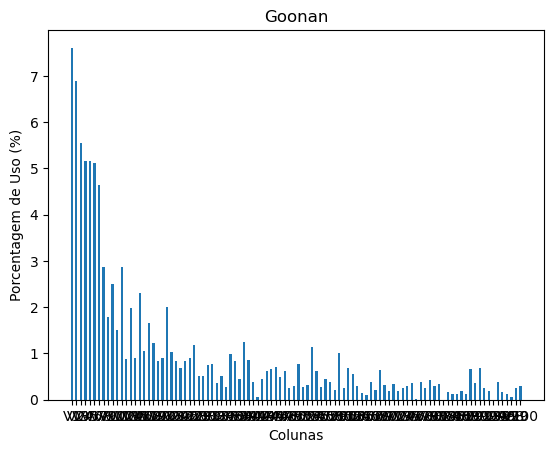

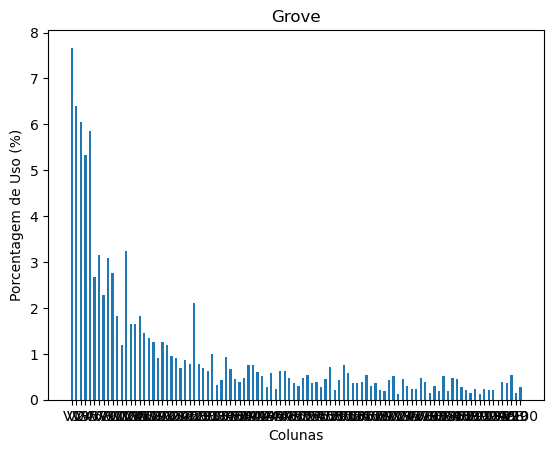

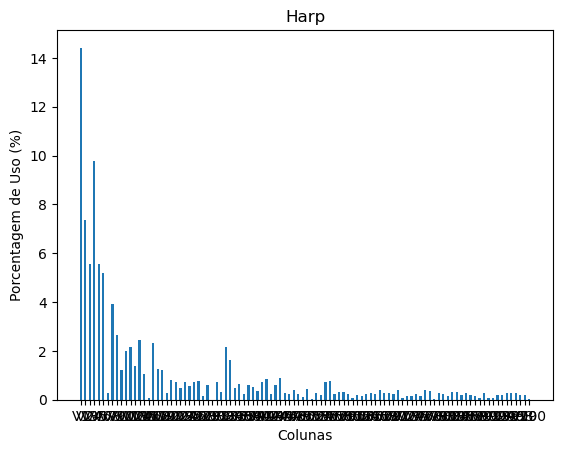

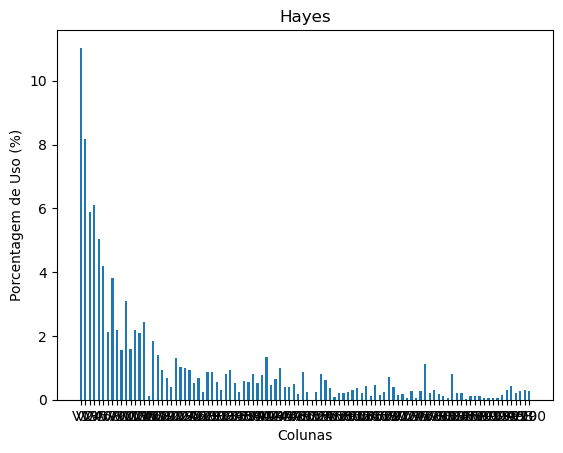

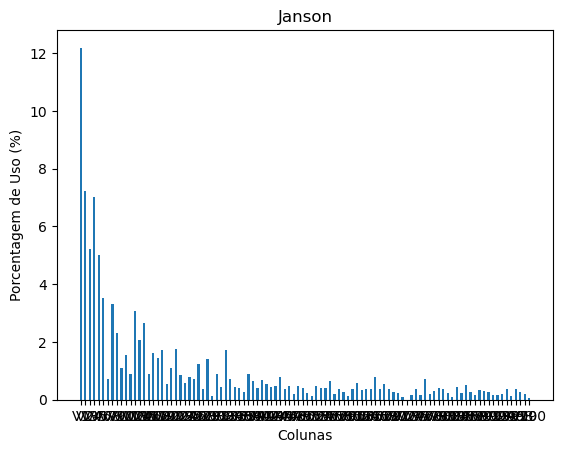

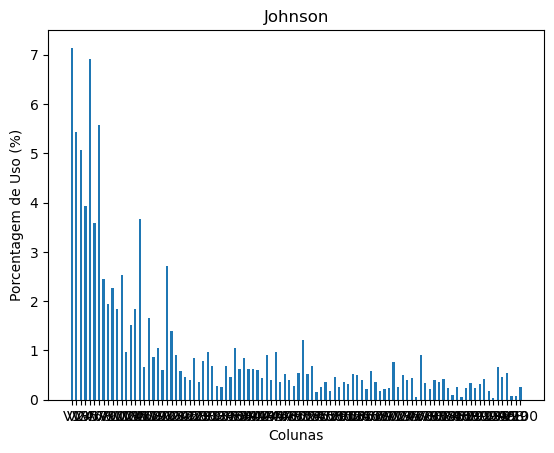

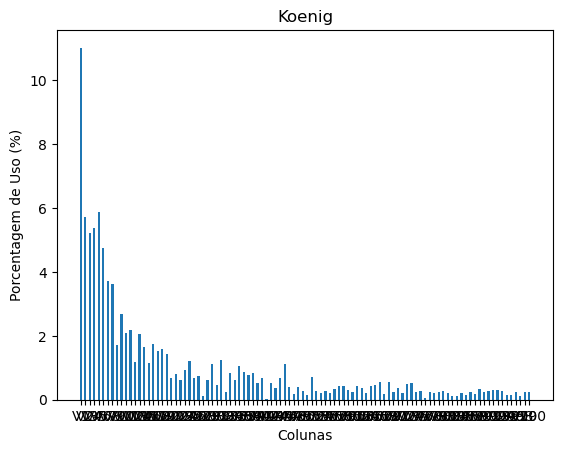

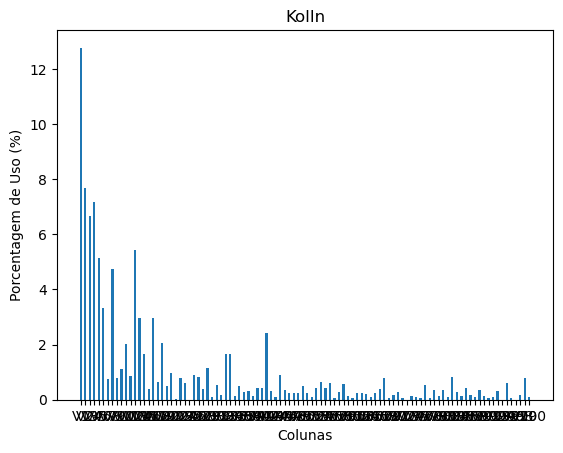

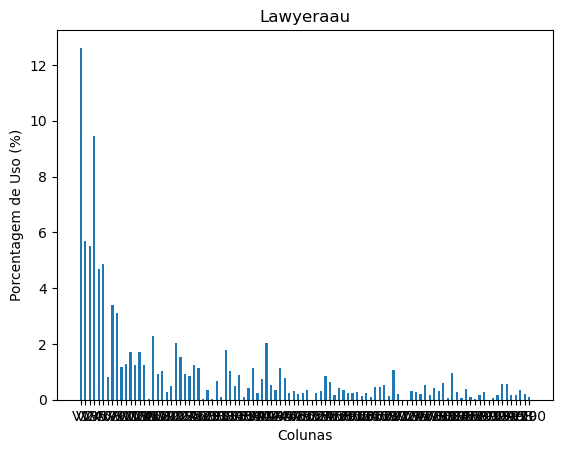

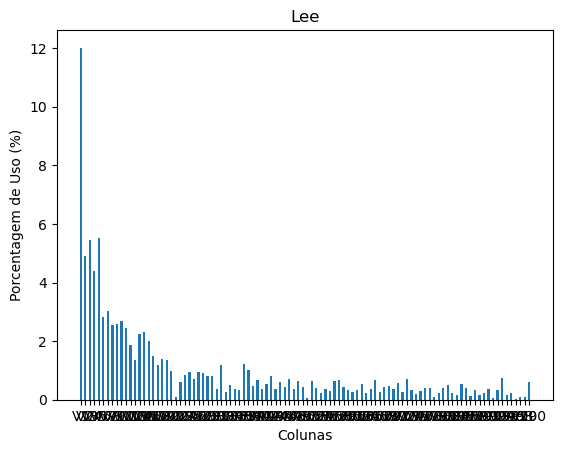

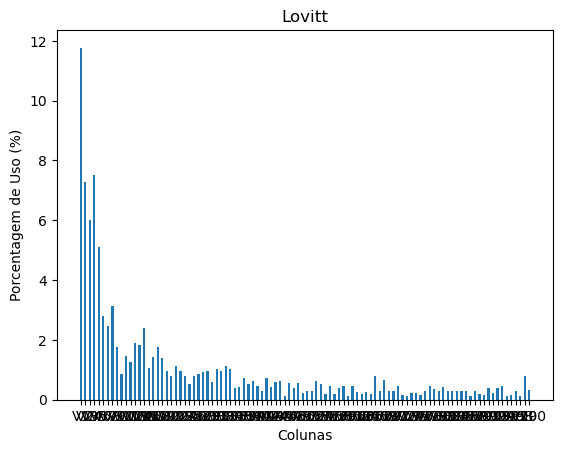

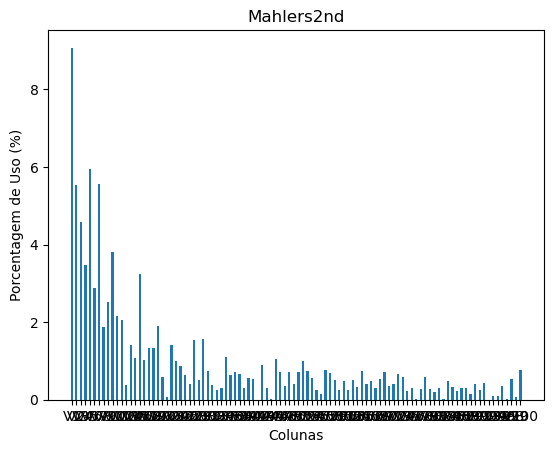

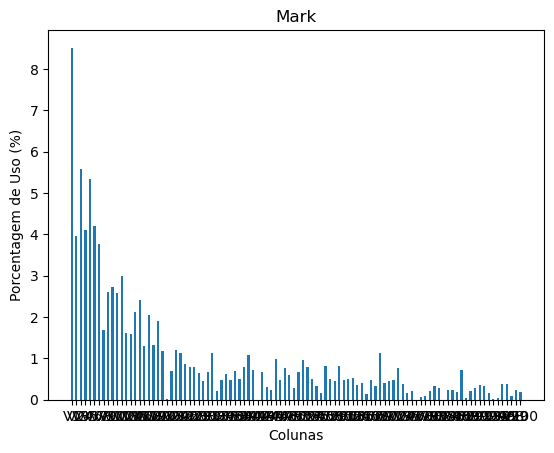

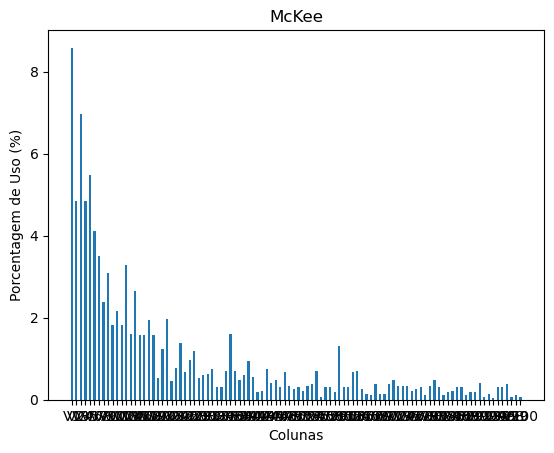

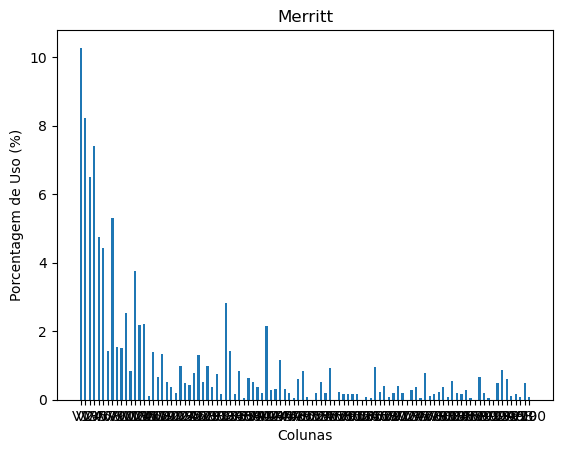

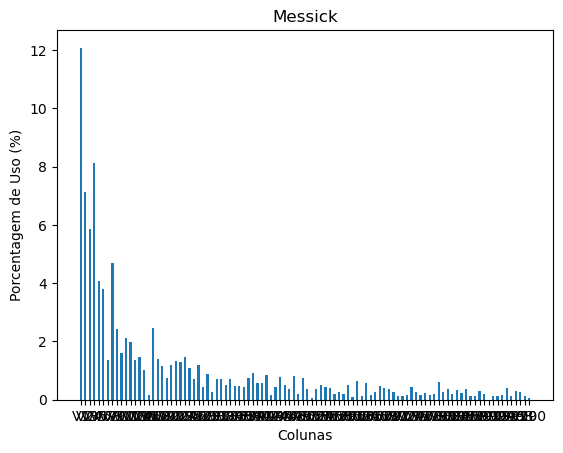

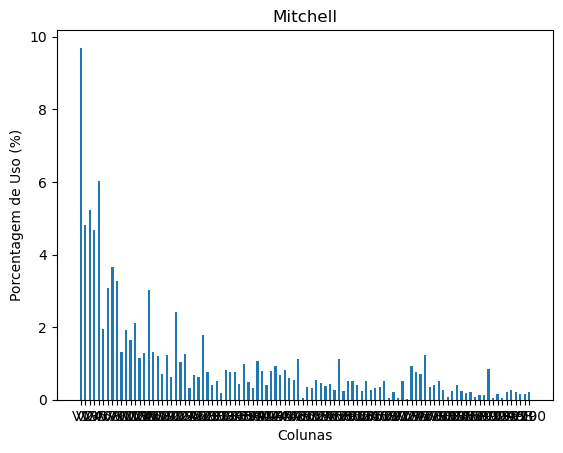

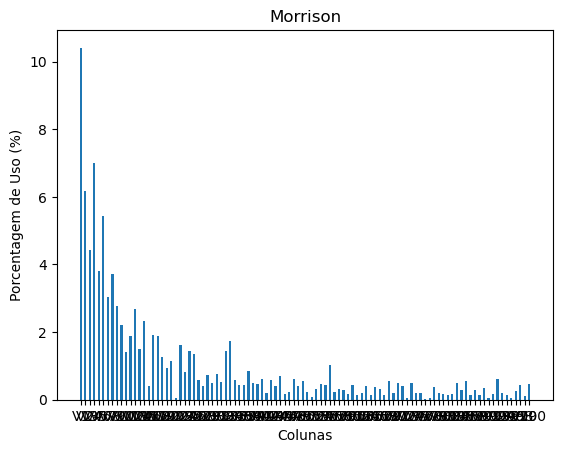

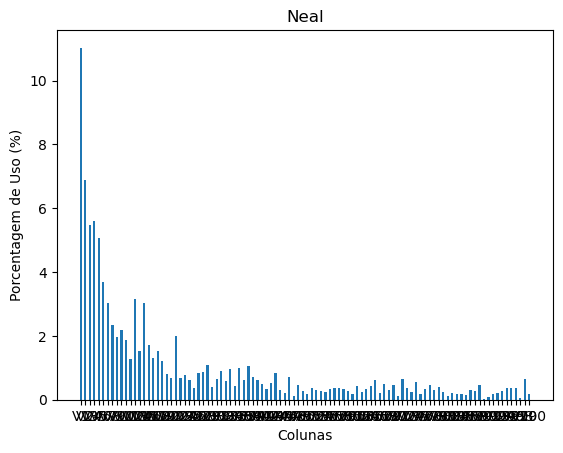

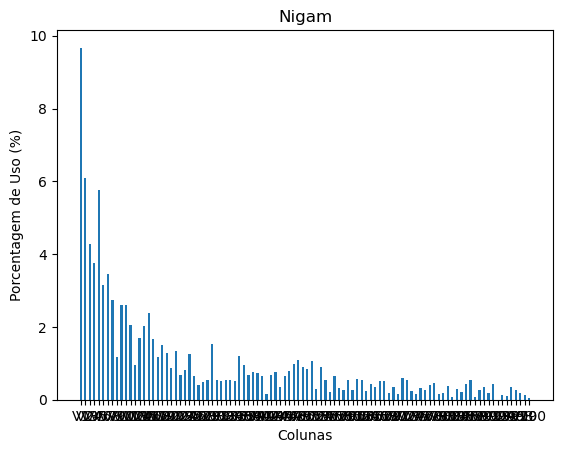

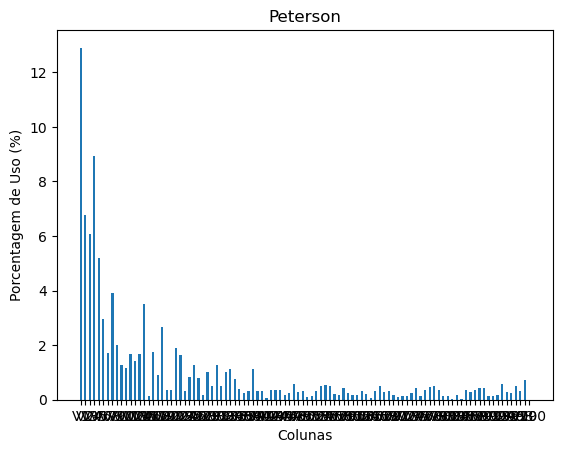

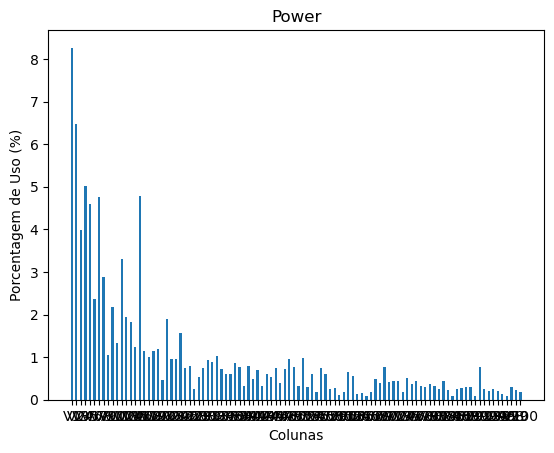

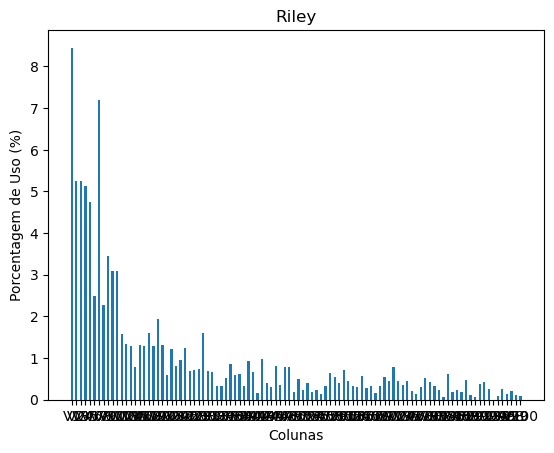

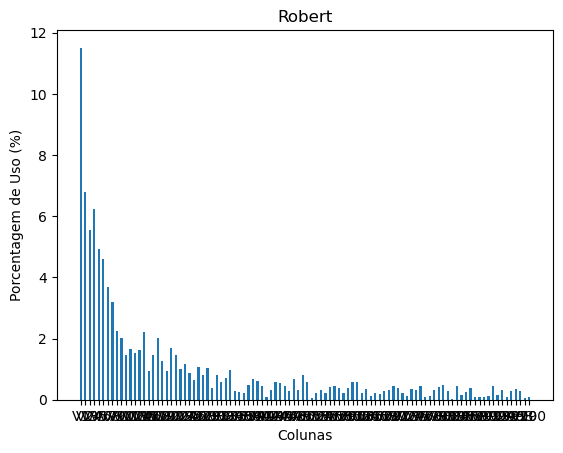

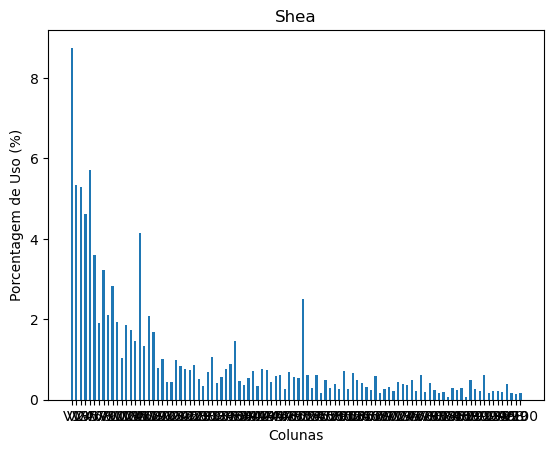

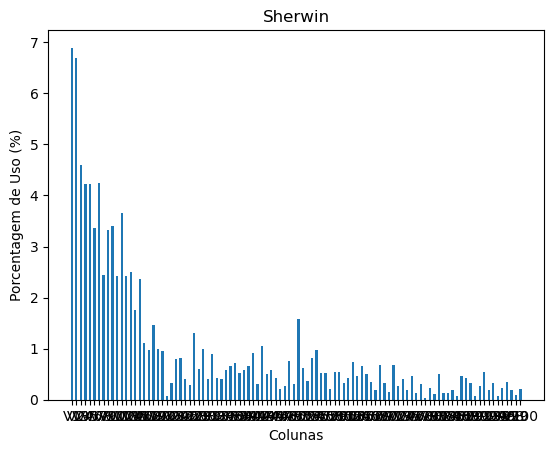

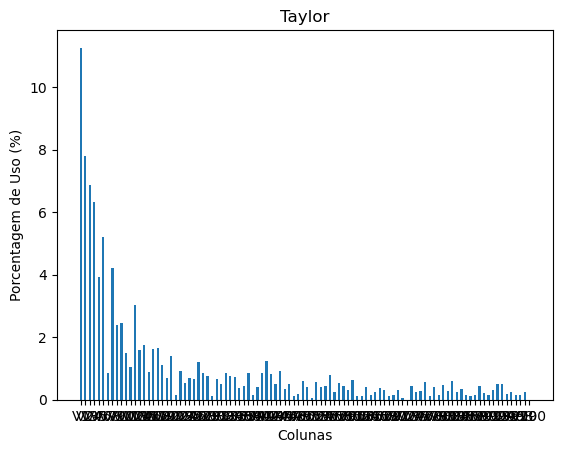

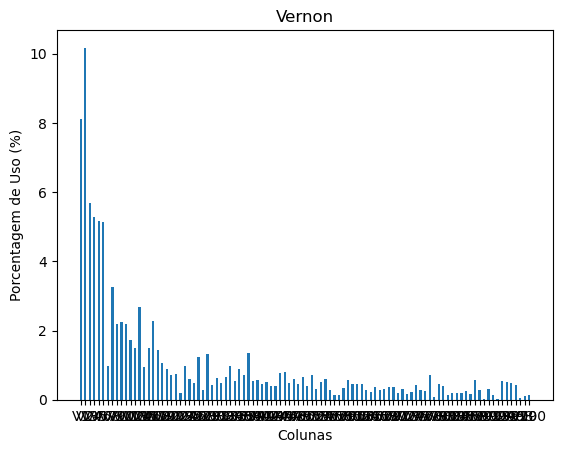

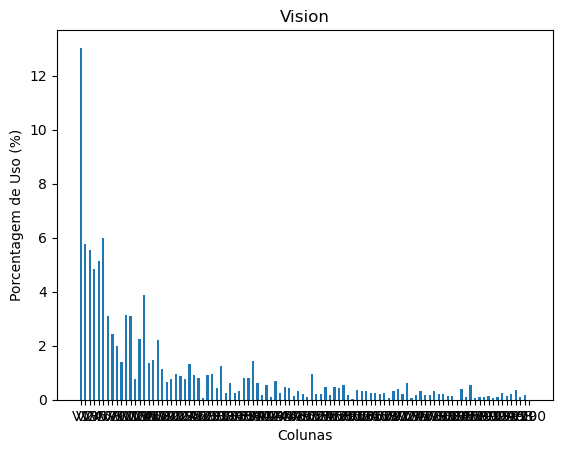

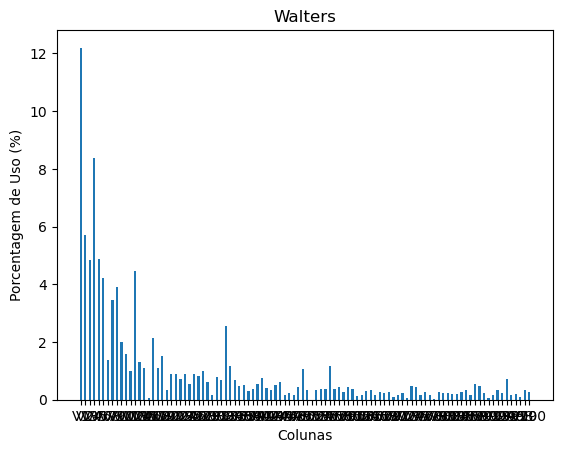

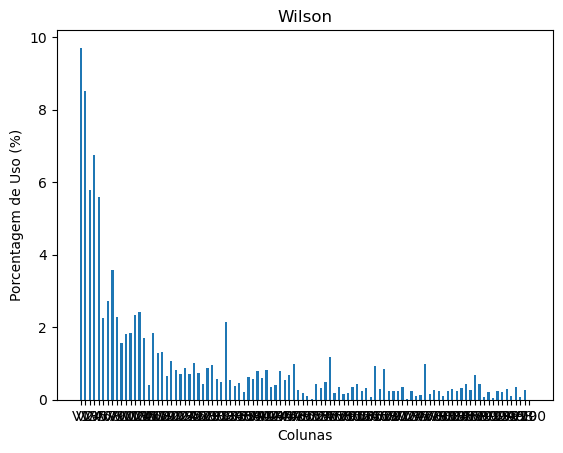

In [8]:
# Defina o número de colunas que você deseja considerar
num_cols = 100

# Selecione apenas as primeiras 'num_cols' colunas de X_reduced
X_reduced_10 = X_reduced.iloc[:, :num_cols]

# Calcule a soma total das colunas selecionadas
total = X_reduced_10.sum(axis=1)

# Crie um novo DataFrame para armazenar o resultado
X_normalized_10 = pd.DataFrame()

# Normalizar cada valor pelo total da soma das colunas
for col in X_reduced_10.columns:
    X_normalized_10[col] = X_reduced_10[col].reset_index(drop=True) / total.reset_index(drop=True) * 100

# cria o histograma para cada usuário
for i, row in X_normalized_10.iterrows():
    # Cria uma nova figura para cada usuário
    plt.figure()

    # Cria um histograma com os valores
    plt.bar(X_normalized_10.columns, row, width= 0.5)

    plt.title(X_reduced.index[i])

    plt.xlabel('Colunas')
    plt.ylabel('Porcentagem de Uso (%)')

    # Mostra o gráfico
    plt.show()
